In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('migraine_data.csv')

In [ ]:
df.head(10)

Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   
5   49         1          1         1          1          3       1      0   
6   27         1          5         1          1          3       1      0   
7   24         1          1         1          1          2       1      0   
8   50         1          5         1          1          2       1      1   
9   23         1          1         1          1          3       1      1   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   
5            1            1  ...        0         0           0         0   
6            1            1  ...        1         1           0         0   
7            1            1  ...        1         0           0         0   
8            1            1  ...        1         0           0         0   
9            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF                        Type  
0       0       0           0            0    0  Typical aura with migraine  
1       0       0           0            0    0  Typical aura with migraine  
2       0       0           0            0    0  Typical aura with migraine  
3       0       0           0            0    0  Typical aura with migraine  
4       0       0           0            0    1  Typical aura with migraine  
5       0       0           0            0    0       Migraine without aura  
6       0       0           0            0    0           Basilar-type aura  
7       0       0           0            0    1  Typical aura with migraine  
8       0       0           0            0    1  Typical aura with migraine  
9       0       0           0            0    0  Typical aura with migraine  

[10 rows x 24 columns]

In [ ]:
df.shape

(400, 24)

In [ ]:

df.isna().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [ ]:
df.dtypes

Age             int64
Duration        int64
Frequency       int64
Location        int64
Character       int64
Intensity       int64
Nausea          int64
Vomit           int64
Phonophobia     int64
Photophobia     int64
Visual          int64
Sensory         int64
Dysphasia       int64
Dysarthria      int64
Vertigo         int64
Tinnitus        int64
Hypoacusis      int64
Diplopia        int64
Defect          int64
Ataxia          int64
Conscience      int64
Paresthesia     int64
DPF             int64
Type           object
dtype: object

In [ ]:
df['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Type'] = labelencoder.fit_transform(df['Type'])

In [ ]:
df.dtypes

Age            int64
Duration       int64
Frequency      int64
Location       int64
Character      int64
Intensity      int64
Nausea         int64
Vomit          int64
Phonophobia    int64
Photophobia    int64
Visual         int64
Sensory        int64
Dysphasia      int64
Dysarthria     int64
Vertigo        int64
Tinnitus       int64
Hypoacusis     int64
Diplopia       int64
Defect         int64
Ataxia         int64
Conscience     int64
Paresthesia    int64
DPF            int64
Type           int64
dtype: object

In [ ]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [ ]:
df['Type'].value_counts()

Type
5    247
2     60
1     24
6     20
0     18
3     17
4     14
Name: count, dtype: int64

**'Typical aura with migraine', 'Migraine without aura', 'Basilar-type aura', 'Sporadic hemiplegic migraine', 'Familial hemiplegic migraine', 'Other',
'Typical aura without migraine'**

In [ ]:
df['Type'].unique()

array([5, 2, 0, 4, 1, 3, 6])

In [ ]:
Features = ['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF']

<Axes: >

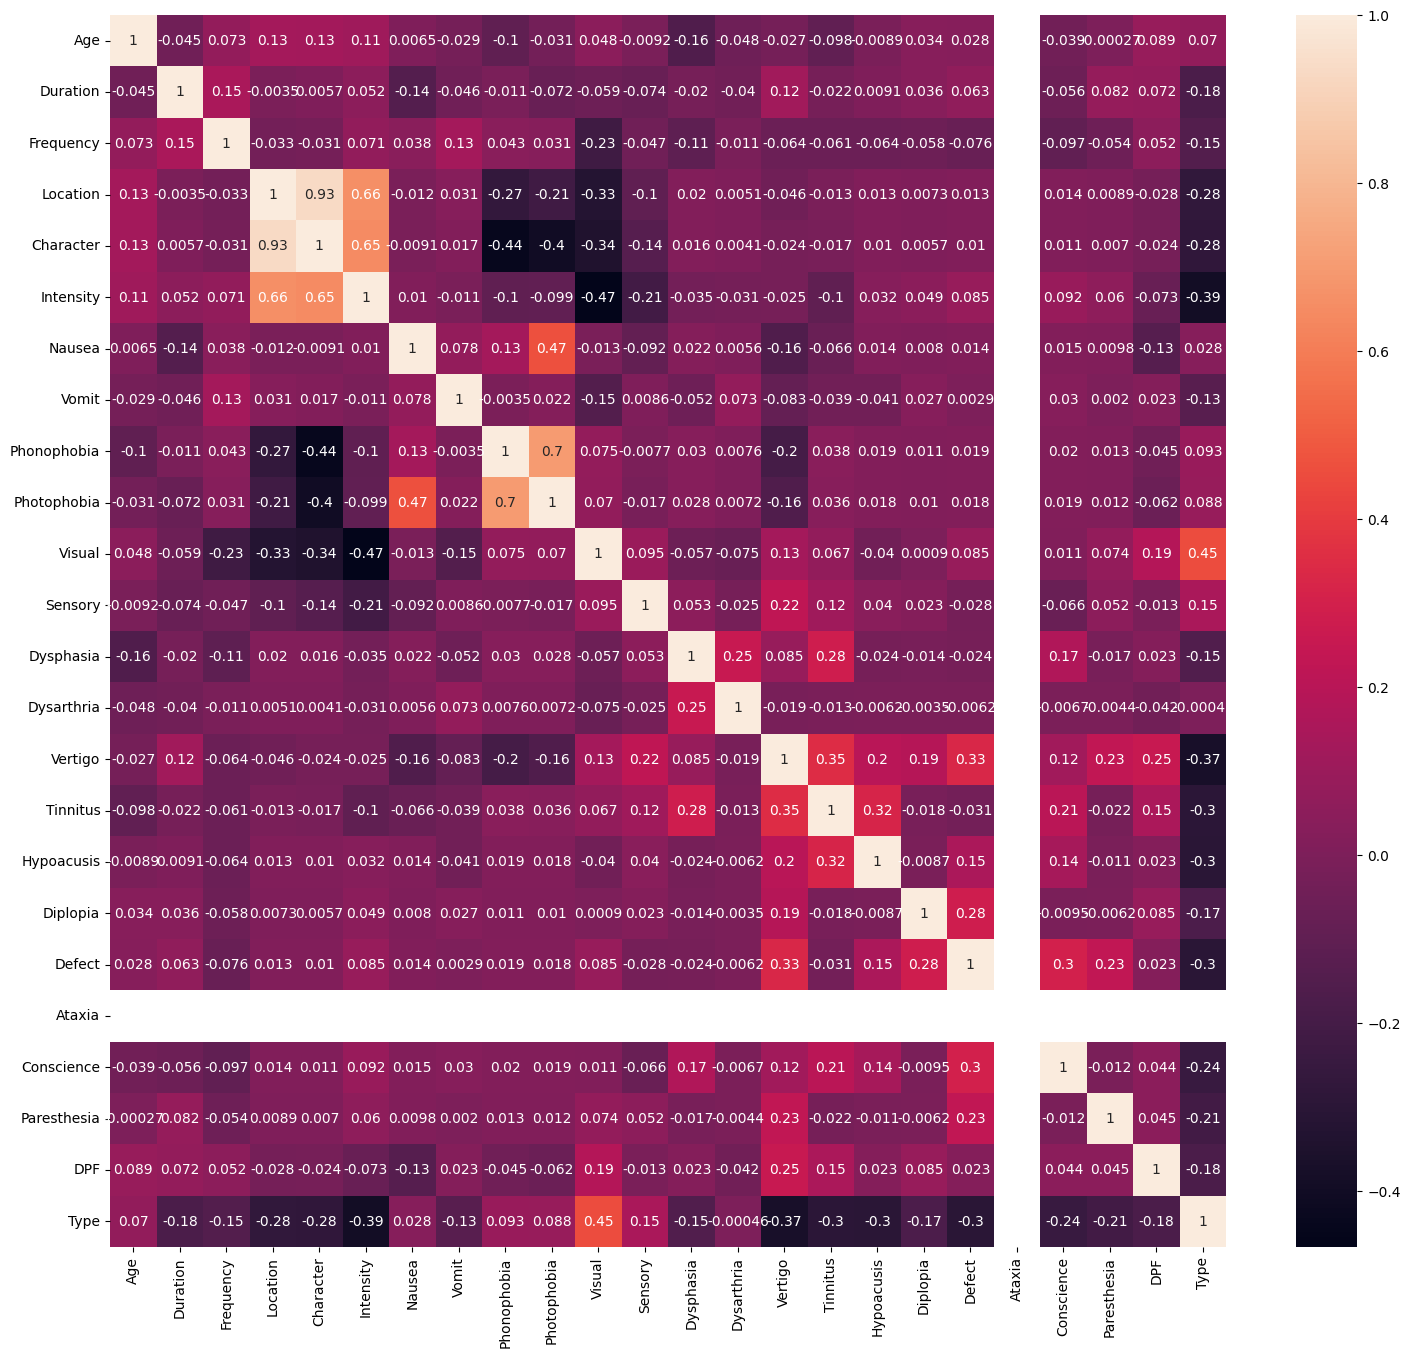

In [ ]:
plt.figure(figsize=(18,16))
c=df.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.80)

In [ ]:
X_train = train[Features]
Y_train = train['Type']

X_test = test[Features]
Y_test = test['Type']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
model.score(X_test, Y_test)

0.925

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[5 5 5 5 5 1 5 5 6 5 2 6 5 5 5 2 5 5 2 5 5 2 5 3 5 5 5 5 5 2 5 5 5 2 5 5 2
 0 1 0 5 5 5 5 5 5 5 3 5 5 5 5 2 5 1 5 2 6 5 6 5 5 2 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5]


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 2,  2,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  0,  4]])

Text(70.72222222222221, 0.5, 'real')

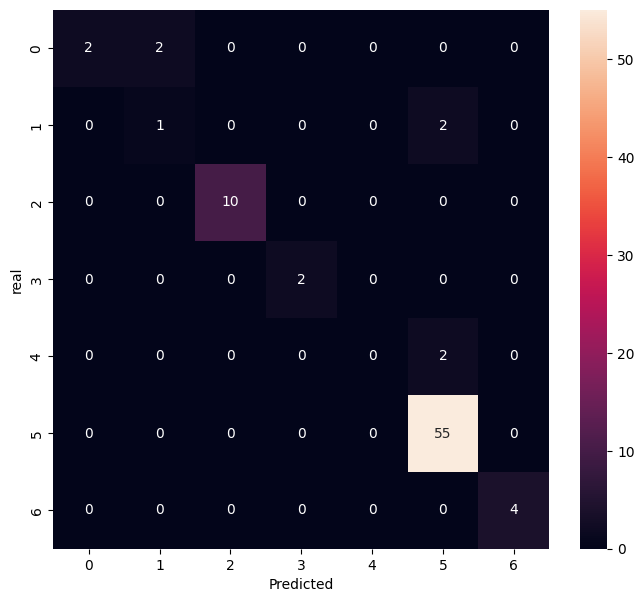

In [ ]:
plt.figure(figsize =(8,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  92.5 %,  74.0 correct detections
Inaccuracy:  7.5 %,  6.0 Incorrect detections


In [ ]:
df.loc[5]

Age            49
Duration        1
Frequency       1
Location        1
Character       1
Intensity       3
Nausea          1
Vomit           0
Phonophobia     1
Photophobia     1
Visual          0
Sensory         0
Dysphasia       0
Dysarthria      0
Vertigo         0
Tinnitus        0
Hypoacusis      0
Diplopia        0
Defect          0
Ataxia          0
Conscience      0
Paresthesia     0
DPF             0
Type            2
Name: 5, dtype: int64

In [ ]:
input_data=(49,1,1,1,1,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction == [0]:
  print("Basilar-type aura")
elif prediction == [1]:
  print("Familial hemiplegic migraine")
elif prediction == [2]:
  print("Migraine without aura")
elif prediction == [3]:
  print("other")
elif prediction == [4]:
  print("Sporadic hemiplegic migraine")
elif prediction == [5]:
  print("Typical aura with migraine")
else:
  print("Typical aura without migraine")

Migraine without aura


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle


In [ ]:
filename = 'Migraine_model.sav'
pickle.dump(model, open(filename, 'wb'))